<a href="https://colab.research.google.com/github/SushilKokare/Deep_Learning_Lab/blob/main/2_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


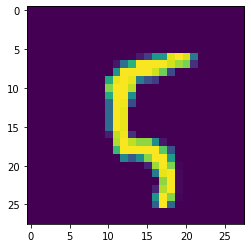

In [5]:
plt.imshow(x_train[100])

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
def plot(epochs,hist,list_of_metrics):
  plt.figure()
  plt.xlabel('Number of epochs')
  plt.ylabel('The value')
  for m in list_of_metrics:
    x=hist[m]
    plt.plot(epochs[1:],x[1:],label=m)
  plt.legend()

In [46]:
def create_model(lr):
  model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(32,activation='relu'),
    Dropout(rate=0.1),
    Dense(32,activation='relu'),
    Dropout(rate=0.01),
    Dense(10,activation='softmax')
    ])
  model.compile(optimizer = tf.keras.optimizers.legacy.Adam(lr=lr),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [53]:
def train_model(model,train_features,train_label,epochs,batch=None,val_split=0.1):
  history = model.fit(x=train_features,y=train_label,batch_size=batch,epochs=epochs,
                      shuffle=True,validation_split=val_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  return epochs,hist

In [48]:
lr=0.003
epochs=20
batch=4000
val_split=0.2 

In [49]:
my_model = create_model(lr)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [50]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trai

In [51]:
# def train_model(model,train_features,train_label,epochs,batch=None,val_split=0.1):
#   history = model.fit(x=train_features,y=train_label,batch_size=batch,epochs=epochs,
#                       shuffle=True,validation_split=val_split)
#   epochs = history.epochs
#   hist = pd.DataFrame(history.history)
#   return epochs,hist

In [54]:
epochs,hist = train_model(model=my_model,
                          train_features=x_train,
                          train_label=y_train,
                          epochs=epochs,
                          batch=batch,
                          val_split=val_split)

Epoch 1/20
12/12 [==============================] - 0s 41ms/step - loss: 0.1899 - accuracy: 0.9419 - val_loss: 0.1564 - val_accuracy: 0.9523
Epoch 2/20
12/12 [==============================] - 0s 39ms/step - loss: 0.1847 - accuracy: 0.9431 - val_loss: 0.1542 - val_accuracy: 0.9540
Epoch 3/20
12/12 [==============================] - 0s 38ms/step - loss: 0.1809 - accuracy: 0.9448 - val_loss: 0.1499 - val_accuracy: 0.9556
Epoch 4/20
12/12 [==============================] - 0s 39ms/step - loss: 0.1786 - accuracy: 0.9453 - val_loss: 0.1490 - val_accuracy: 0.9559
Epoch 5/20
12/12 [==============================] - 0s 38ms/step - loss: 0.1714 - accuracy: 0.9471 - val_loss: 0.1466 - val_accuracy: 0.9557
Epoch 6/20
12/12 [==============================] - 0s 36ms/step - loss: 0.1701 - accuracy: 0.9476 - val_loss: 0.1444 - val_accuracy: 0.9567
Epoch 7/20
12/12 [==============================] - 0s 35ms/step - loss: 0.1681 - accuracy: 0.9477 - val_loss: 0.1429 - val_accuracy: 0.9572
Epoch 8/20
12

In [55]:
list_of_metrics = ['accuracy']

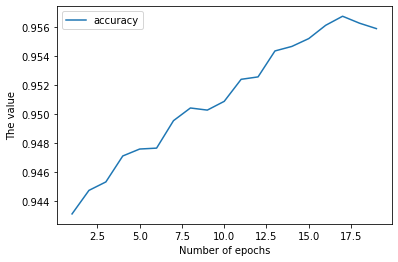

In [56]:
plot(epochs,hist,list_of_metrics)

In [58]:
my_model.evaluate(x_test,y_test,batch_size=batch)

3/3 [==============================] - 0s 9ms/step - loss: 0.1286 - accuracy: 0.9615


[0.12859474122524261, 0.9614999890327454]